In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [5]:
df.columns

Index(['age', 'ethnicity', 'gender', 'img_name', 'pixels'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [7]:
df.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [8]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

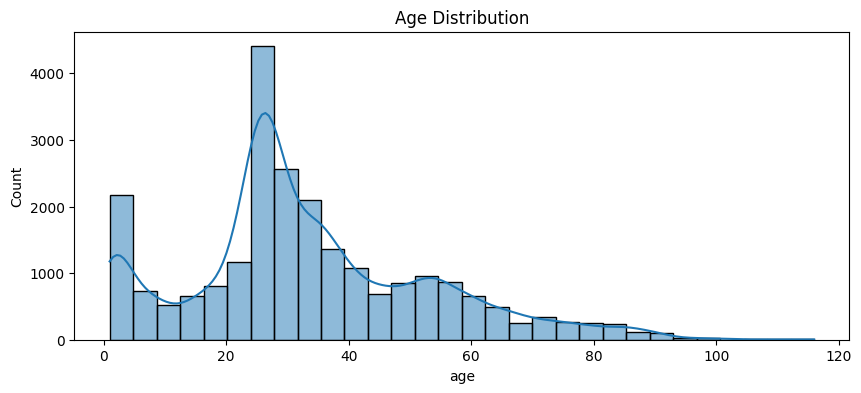

In [9]:
# Age distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

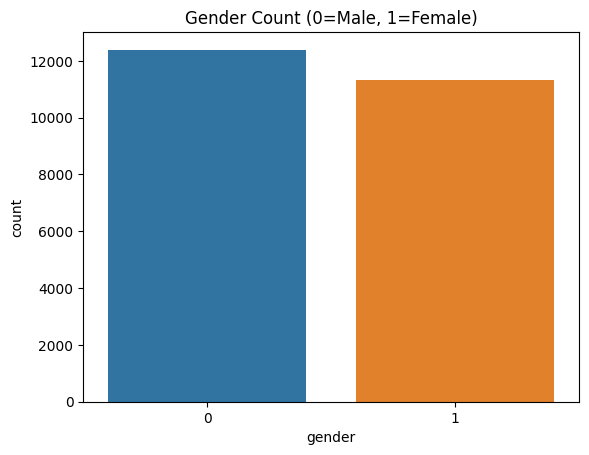

In [10]:
# Gender count
sns.countplot(data=df, x='gender')
plt.title('Gender Count (0=Male, 1=Female)')
plt.show()

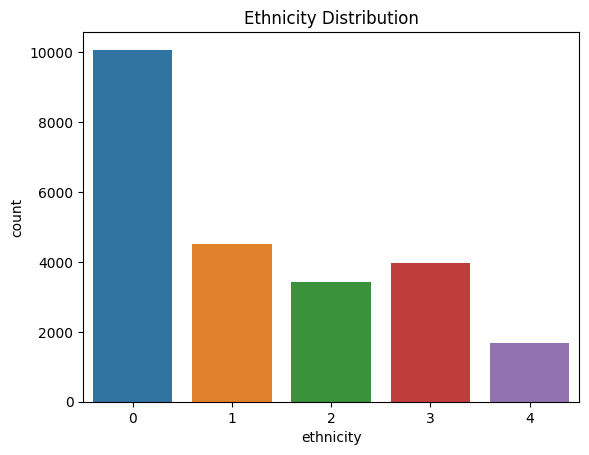

In [11]:
# Ethnicity count
sns.countplot(data=df, x='ethnicity')
plt.title('Ethnicity Distribution')
plt.show()

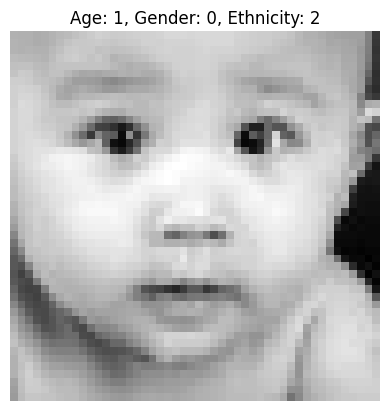

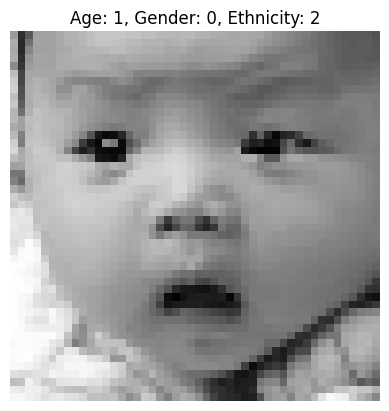

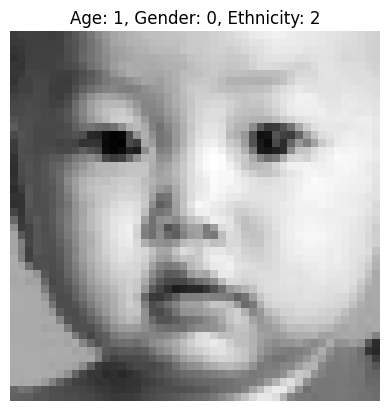

In [12]:
import numpy as np
import cv2

# Convert pixel string to image
def show_image(i):
    pixels = np.fromstring(df['pixels'][i], sep=' ').reshape(48, 48).astype('uint8')
    plt.imshow(pixels, cmap='gray')
    plt.title(f"Age: {df['age'][i]}, Gender: {df['gender'][i]}, Ethnicity: {df['ethnicity'][i]}")
    plt.axis('off')
    plt.show()

# Show 3 sample images
for i in range(3):
    show_image(i)

In [13]:
from sklearn.model_selection import train_test_split

# Convert all images to arrays
X = np.stack(df['pixels'].apply(lambda x: np.fromstring(x, sep=' ').reshape(48, 48).astype('uint8')), axis=0)
X = X / 255.0  # Normalize
X = X.reshape(-1, 48, 48, 1)  # Add channel

# Target labels
y_age = df['age']
y_gender = df['gender']
y_ethnicity = df['ethnicity']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_age, test_size=0.2, random_state=42)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)  # Age prediction (regression)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

2025-10-03 11:30:43.672634: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759491043.895101      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759491043.962147      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-03 11:30:57.846440: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 838,273 (3.20 MB)

 Trainable params: 838,273 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train with 3 epochs (for speed)
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
593/593 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - loss: 452.1839 - mae: 16.2424 - val_loss: 233.5956 - val_mae: 12.2893
Epoch 2/3
593/593 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - loss: 214.9051 - mae: 11.1864 - val_loss: 181.8423 - val_mae: 10.0794
Epoch 3/3
593/593 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - loss: 188.1441 - mae: 10.3674 - val_loss: 163.1523 - val_mae: 9.3977


149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


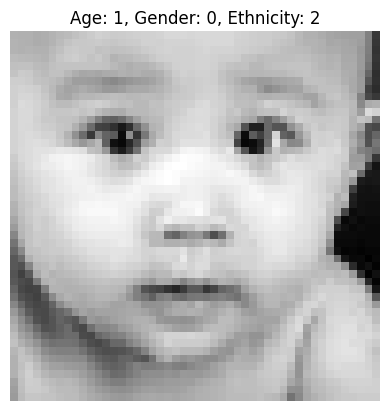

Actual Age: 49, Predicted Age: 23


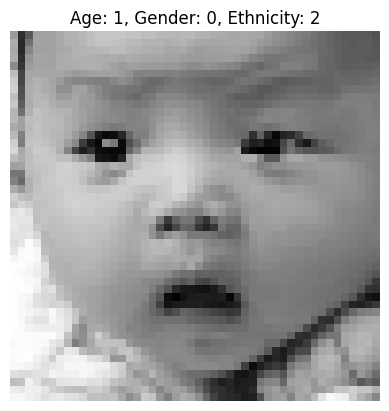

Actual Age: 39, Predicted Age: 37


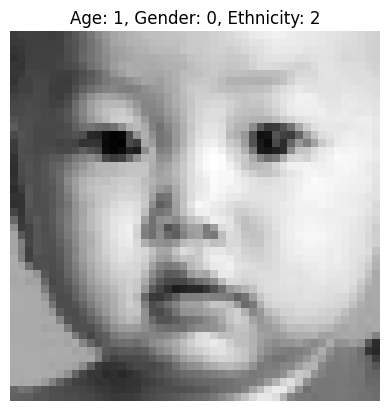

Actual Age: 8, Predicted Age: 11


In [17]:
# Predict on test set
y_pred = model.predict(X_test).flatten()

# Show real vs predicted
for i in range(3):
    show_image(i)
    print(f"Actual Age: {y_test.values[i]}, Predicted Age: {int(y_pred[i])}")

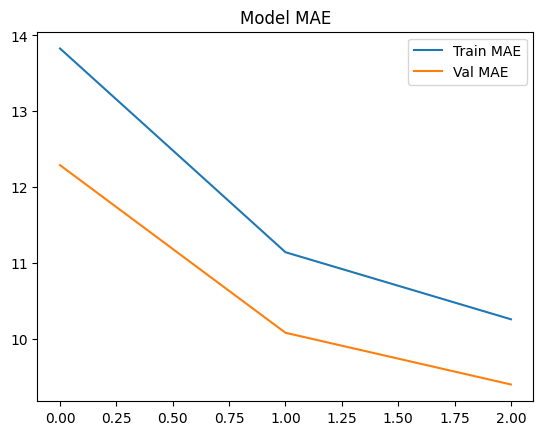

In [18]:
# Plot training vs validation MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.legend()
plt.show()